In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts

In [2]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

## Let's do some EDA

In [3]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1628.0,814.500000,470.107435,1.0,407.75,814.5,1221.25,1628.0
Age,1628.0,35.645577,9.481794,18.0,29.00,34.0,42.00,60.0
Attrition,1628.0,0.482187,0.499836,0.0,0.00,0.0,1.00,1.0
DistanceFromHome,1628.0,9.735258,8.306546,1.0,2.00,8.0,15.00,29.0
Education,1628.0,2.884521,1.020470,1.0,2.00,3.0,4.00,5.0
EmployeeNumber,1628.0,1000.985872,585.417694,1.0,509.25,977.0,1494.00,2068.0
EnvironmentSatisfaction,1628.0,2.646192,1.125283,1.0,2.00,3.0,4.00,4.0
JobInvolvement,1628.0,2.650491,0.736330,1.0,2.00,3.0,3.00,4.0
JobSatisfaction,1628.0,2.639435,1.096272,1.0,2.00,3.0,4.00,4.0
MonthlyIncome,1628.0,5785.524570,4339.293147,1009.0,2625.00,4304.0,7124.25,19999.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 29 columns):
Id                         1628 non-null int64
Age                        1628 non-null int64
Attrition                  1628 non-null int64
BusinessTravel             1628 non-null object
Department                 1628 non-null object
DistanceFromHome           1628 non-null int64
Education                  1628 non-null int64
EducationField             1628 non-null object
EmployeeNumber             1628 non-null int64
EnvironmentSatisfaction    1628 non-null int64
Gender                     1628 non-null object
JobInvolvement             1628 non-null int64
JobRole                    1628 non-null object
JobSatisfaction            1628 non-null int64
MaritalStatus              1628 non-null object
MonthlyIncome              1628 non-null int64
NumCompaniesWorked         1628 non-null int64
OverTime                   1628 non-null object
PercentSalaryHike          1628 non-null

In [9]:
test.isnull().value_counts

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

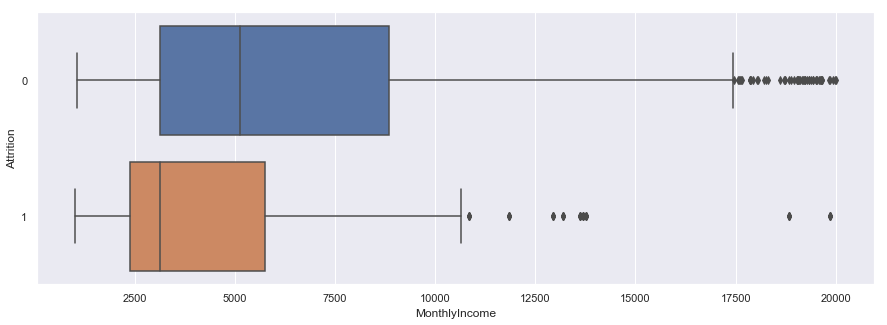

In [9]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Attrition',data=train,x='MonthlyIncome',orient='h')

In [10]:
train[train.MonthlyIncome>12500].Attrition.value_counts()

0    120
1     35
Name: Attrition, dtype: int64

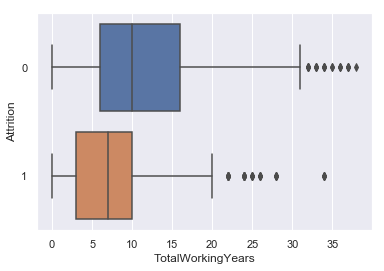

In [11]:
sns.boxplot(y='Attrition',data=train,x='TotalWorkingYears',orient='h')

In [12]:
train[train.TotalWorkingYears>20].Attrition.value_counts()

0    132
1     40
Name: Attrition, dtype: int64

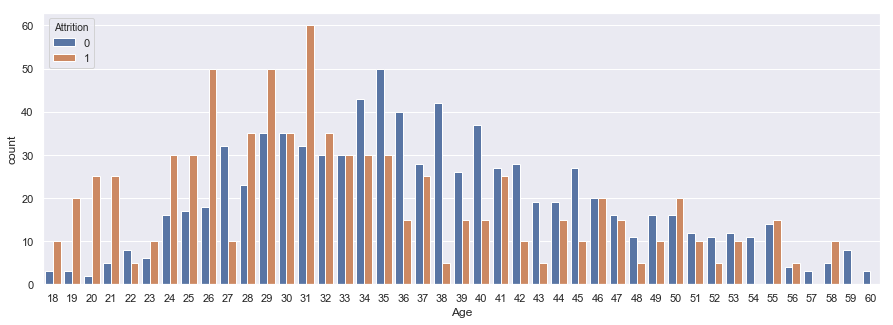

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(hue='Attrition',data=train,x='Age')

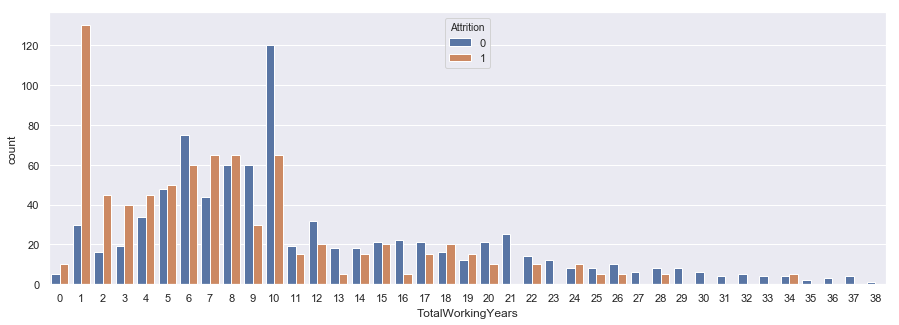

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(hue='Attrition',data=train,x='TotalWorkingYears')

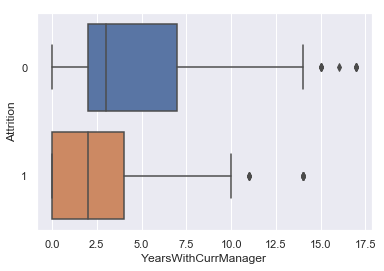

In [15]:
sns.boxplot(y='Attrition',data=train,x='YearsWithCurrManager',orient='h')

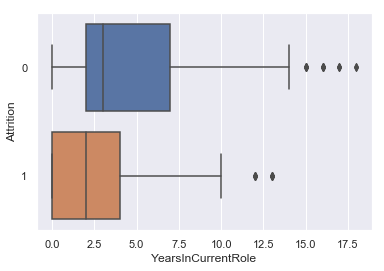

In [16]:
sns.boxplot(y='Attrition',data=train,x='YearsInCurrentRole',orient='h')

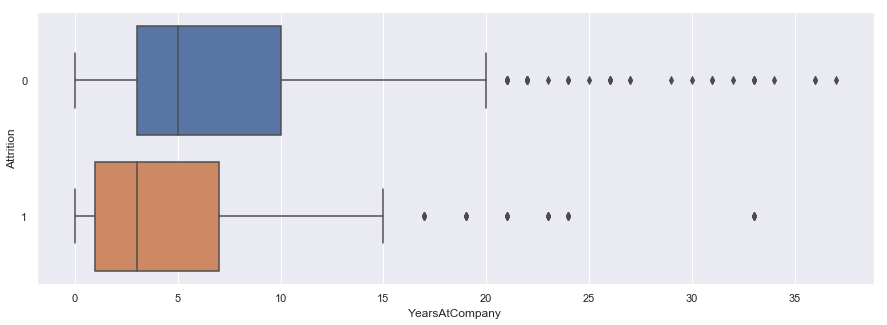

In [17]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Attrition',data=train,x='YearsAtCompany',orient='h')

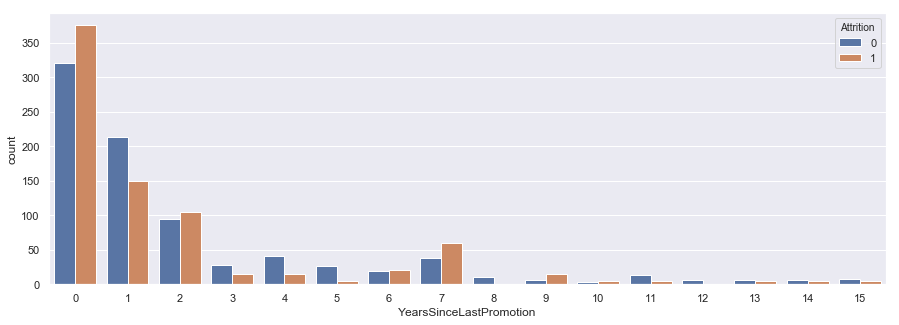

In [18]:
plt.figure(figsize=(15,5))

sns.countplot(data=train,x='YearsSinceLastPromotion',hue='Attrition')

(array([ 15., 160., 120., 312., 324., 294., 173., 137.,  61.,  32.]),
 array([0.       , 0.6164414, 1.2328828, 1.8493242, 2.4657656, 3.082207 ,
        3.6986484, 4.3150898, 4.9315312, 5.5479726, 6.164414 ]),
 <a list of 10 Patch objects>)

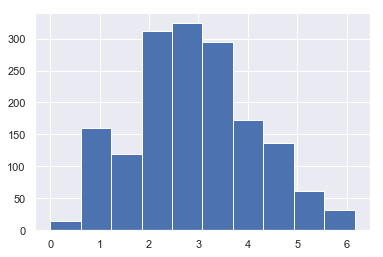

In [19]:
plt.hist(np.sqrt(train['TotalWorkingYears']))

# Data Preprocessing

In [10]:
# Normalising Data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
## Dropping Unnecessary Columns based on EDA

In [11]:
train[['Age','DistanceFromHome','EmployeeNumber','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','MonthlyIncome','TotalWorkingYears','YearsAtCompany']]=scaler.fit_transform(train[['Age','DistanceFromHome','EmployeeNumber','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','MonthlyIncome','TotalWorkingYears','YearsAtCompany']])

In [12]:
test[['Age','DistanceFromHome','EmployeeNumber','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','MonthlyIncome','TotalWorkingYears','YearsAtCompany']]=scaler.fit_transform(test[['Age','DistanceFromHome','EmployeeNumber','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','MonthlyIncome','TotalWorkingYears','YearsAtCompany']])

In [13]:
train2=train.drop(['Id','DistanceFromHome','EmployeeNumber','Gender','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','TrainingTimesLastYear','YearsWithCurrManager','Behaviour','CommunicationSkill'],axis=1)
test2=test.drop(['Id','DistanceFromHome','EmployeeNumber','Gender','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','TrainingTimesLastYear','YearsWithCurrManager','Behaviour','CommunicationSkill'],axis=1)

In [14]:
train3=pd.get_dummies(train, drop_first=True)

In [20]:
X_test=pd.get_dummies(test, drop_first=True)

In [16]:
y_train3=pd.Series(train.Attrition)
train3.drop('Attrition', axis=1, inplace=True)

In [20]:
#train4=train3.apply(np.sqrt, axis=0, raw=True)

In [23]:
#X_test=X_test1.apply(np.sqrt, axis=0, raw=True)

In [28]:
X_train, X_val, y_train, y_val=tts(train3,y_train3,test_size=0.2)

In [29]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1302, 42), (326, 42), (1302,), (326,))

In [17]:
from sklearn.metrics import roc_auc_score

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(train3,y_train3)
tuning.best_params_, tuning.best_score_


C:\Users\Herin Savla\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'learning_rate': 0.001, 'n_estimators': 100}, 0.7936800377536575)

In [12]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01,n_estimators=1500, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(train3,y_train3)
tuning.best_params_, tuning.best_score_

C:\Users\Herin Savla\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'max_depth': 7}, 0.7825011798017933)

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier(max_depth=7,n_estimators=100,learning_rate=0.001)
gb.fit(train3,y_train3)

print('RUC_AUC score for GBC Trainig for  is'  +str(roc_auc_score(y_train3,gb.predict(train3))))

RUC_AUC score for GBC Trainig for  is0.9601355486547136


In [14]:
gb_pred=gb.predict_proba(X_test)
g=[]
for i in gb_pred:
        g.append(i[1])

In [15]:
gbsub= pd.DataFrame({'ID':np.arange(1,471), 'Attrition':g}, index=None, columns=['ID','Attrition'])

In [16]:
gbsub.to_csv('gb_sub3.csv', index=False)

# Logistic Regression

In [18]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train3, y_train3)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.883909 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.875932 (0.024166) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.872857 (0.020506) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.877158 (0.024160) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.876337 (0.023089) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.875108 (0.025446) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.878794 (0.022548) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.881659 (0.019827) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.875521 (0.022856) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.879611 (0.020316) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.883909 (0.023680) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.875105 (0.023404) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.881247 (0.023843) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.871625 (0.024468) wit

In [19]:

C_range=[0.01,0.1,1,10,100]
solvers = ['newton-cg', 'lbfgs', 'liblinear']
max_itera=[10,100,1000,1500]

#for i in max_itera:
lr=LogisticRegression(C=0.1,random_state=0,solver='newton-cg',penalty='l2',max_iter=100)
lr.fit(train3,y_train3)
print('RUC_AUC score for Logistic Regression Trainig for  is'  +str(roc_auc_score(y_train3,lr.predict(train3))))
#print('RUC_AUC score for Logistic Regression Validation for is'   +str(roc_auc_score(y_val,lr.predict(X_val))))
print('\n')

RUC_AUC score for Logistic Regression Trainig for  is0.8883740961534102




In [15]:
lr_pred=lr.predict_proba(X_test)
r=[]
for i in lr_pred:
        r.append(i[1])

In [16]:
sub1= pd.DataFrame({'ID':np.arange(1,471), 'Attrition':r}, index=None, columns=['ID','Attrition'])

In [17]:
sub1.to_csv('lr_sub11.csv', index=False)

# Decision Trees

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(max_depth=5,random_state=0)
dt.fit(X_train,y_train)
print('RUC_AUC score for Decision Tree Trainig  is'+str(roc_auc_score(y_train,dt.predict(X_train))))
print('RUC_AUC score for Decision Tree Validation is'+str(roc_auc_score(y_val,dt.predict(X_val))))

RUC_AUC score for Decision Tree Trainig  is0.9292476102374345
RUC_AUC score for Decision Tree Validation is0.9022759505639225


In [14]:
dt_pred=dt.predict_proba(X_test)
d=[]
for i in dt_pred:
        d.append(i[1])

In [15]:
from sklearn.metrics import roc_curve,auc

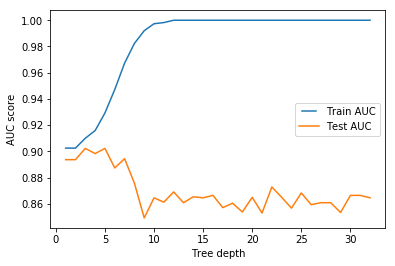

In [16]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt2 = DecisionTreeClassifier(max_depth=max_depth)
    dt2.fit(X_train, y_train)
    train_pred = dt2.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt2.predict(X_val)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, label='Train AUC')
line2, = plt.plot(max_depths, test_results, label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [18]:
sub3= pd.DataFrame({'ID':np.arange(1,471), 'Attrition':d}, index=None, columns=['ID','Attrition'])

In [19]:
sub3.to_csv('dt_sub4.csv', index=False)

# Random Forest

In [21]:
# example of grid searching key hyperparameters for RandomForestClassifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train3, y_train3)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.952712 using {'max_features': 'log2', 'n_estimators': 1000}
0.926307 (0.023422) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.938788 (0.017798) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.940426 (0.017917) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.936730 (0.022892) with: {'max_features': 'log2', 'n_estimators': 10}
0.949850 (0.018334) with: {'max_features': 'log2', 'n_estimators': 100}
0.952712 (0.015762) with: {'max_features': 'log2', 'n_estimators': 1000}


In [22]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=0,max_features='log2',n_estimators=1000)
rf.fit(train3,y_train3)
print('RUC_AUC score for Random Forest Training  is'+str(roc_auc_score(y_train3,rf.predict(train3))))
#print('RUC_AUC score for Random Forest Validation is'+str(roc_auc_score(y_val,rf.predict(X_val))))


RUC_AUC score for Random Forest Training  is1.0


In [21]:
rf_pred=rf.predict_proba(X_test)
r=[]
for i in rf_pred:
        r.append(i[1])        

In [22]:
rf_sub= pd.DataFrame({'ID':np.arange(1,471), 'Attrition':r}, index=None, columns=['ID','Attrition'])

In [23]:
rf_sub.to_csv('rf_sub6.csv', index=False)

# SVC

In [23]:
# example of grid searching key hyperparametres for SVC

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# define dataset

model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train3, y_train3)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.895581 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.884530 (0.022454) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.895581 (0.020540) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.311876 (0.040253) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.881873 (0.023870) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.894763 (0.021240) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.312286 (0.040082) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.881052 (0.024235) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.890670 (0.022864) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.317001 (0.041658) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.882688 (0.023977) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.883713 (0.023631) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.354471 (0.043544) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.894561 (0.021250) with: {'C': 0.01, 'gamma': 'scale', 

In [24]:
from sklearn.svm import SVC
C_range=[0.01,0.1,1,10,100,1000,10000]
gammas = [0.1, 1, 10, 100]
degrees = [0, 1, 2, 3, 4, 5, 6]

#for i in degrees:
svc=SVC(random_state=0,probability=True,C=50,gamma='scale',kernel='rbf')
svc.fit(train3,y_train3)
print('RUC_AUC score for SVM Training  is' +str(roc_auc_score(y_train3,svc.predict(train3))))
print('\n')

RUC_AUC score for SVM Training  is0.8930578537374103




In [27]:
svc_pred=svc.predict_proba(X_test)
s=[]
for i in svc_pred:
        s.append(i[1])

In [28]:
svc_sub= pd.DataFrame({'ID':np.arange(1,471), 'Attrition':s}, index=None, columns=['ID','Attrition'])

In [29]:
svc_sub.to_csv('svc_sub9.csv', index=False)

# Let's do KNN

In [29]:
# example of grid searching key hyperparametres for KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# define dataset
#X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
modelk = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=modelk, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.899888 using {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
0.837931 (0.028336) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.837931 (0.028336) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.872251 (0.026992) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.872251 (0.026992) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.882738 (0.023573) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.883251 (0.024504) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.890159 (0.022761) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.891186 (0.022817) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.894259 (0.022439) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.894261 (0.022944) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.898097 

In [30]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(weights='uniform',metric='euclidean',n_neighbors=19)
neigh.fit(X_train, y_train)

print('RUC_AUC score for KNN Training  is' +str(roc_auc_score(y_train,neigh.predict(X_train))))
print('RUC_AUC score for KNN Validation is' +str(roc_auc_score(y_val,neigh.predict(X_val))))

RUC_AUC score for KNN Training  is0.896061447562777
RUC_AUC score for KNN Validation is0.9125


In [31]:
knn_pred=neigh.predict_proba(X_test)
k=[]
for i in knn_pred:
        k.append(i[1]);

In [32]:
knn_sub= pd.DataFrame({'ID':np.arange(1,471), 'Attrition':k}, index=None, columns=['ID','Attrition'])

In [33]:
knn_sub.to_csv('knn_sub3.csv', index=False)

# Stacking

In [10]:
train3.shape, y_train3.shape, X_test.shape

((1628, 42), (1628,), (470, 42))

In [25]:
# make a prediction with a stacking ensemble

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# define the base models
level0 = list()
level0.append(('svm', SVC(random_state=0,probability=True,C=50,gamma='scale',kernel='rbf')))
level0.append(('rf', RandomForestClassifier(random_state=0,max_features='log2',n_estimators=1000)))
# define meta learner model
level1 = LogisticRegression(C=10,random_state=0,solver='liblinear',penalty='l2',max_iter=1000)
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5, stack_method='predict_proba')
# fit the model on all available data
model.fit(train3, y_train3)


StackingClassifier(cv=5,
                   estimators=[('svm',
                                SVC(C=50, probability=True, random_state=0)),
                               ('rf',
                                RandomForestClassifier(max_features='log2',
                                                       n_estimators=1000,
                                                       random_state=0))],
                   final_estimator=LogisticRegression(C=10, max_iter=1000,
                                                      random_state=0,
                                                      solver='liblinear'),
                   stack_method='predict_proba')

In [26]:
stack_pred=model.predict_proba(X_test)
stack=[]
for i in stack_pred:
        stack.append(i[1])

In [27]:
stack_sub= pd.DataFrame({'ID':np.arange(1,471), 'Attrition':stack}, index=None, columns=['ID','Attrition'])

In [29]:
stack_sub.to_csv('stack_7.csv', index=False)

In [11]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(31,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
	keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train3, y_train3, epochs=25, batch_size=1)

#test_loss, test_acc = model.evaluate(train3, y_train3)
#print('Test accuracy:', test_acc)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
1628/1628 [==============================] - 2s 955us/sample - loss: 0.5974 - acc: 0.6769s - loss: 0.641
Epoch 2/25
1628/1628 [==============================] - 1s 873us/sample - loss: 0.4940 - acc: 0.7549
Epoch 3/25
1628/1628 [==============================] - 1s 827us/sample - loss: 0.4704 - acc: 0.7672
Epoch 4/25
1628/1628 [==============================] - 1s 823us/sample - loss: 0.4494 - acc: 0.7912
Epoch 5/25
1628/1628 [==============================] - 1s 841us/sample - loss: 0.4358 - acc: 0.7998
Epoch 6/25
1628/1628 [==============================] - 1s 822us/sample - loss: 0.4186 - acc: 0.8170
Epoch 7/25
1628/1628 [==============================] - 1s 852us/sample - loss: 0.4108 - acc: 0.8237
Epoch 8/25
1628/1628 [==============================] - 1s 828us/sample - loss: 0.3953 - acc: 0.8249
Epoch 9/25
1628/1628 [==============================] - 1s 824us/sample - loss: 0.3836 - acc: 0.8280
Epoch 10/25
1628/1628 [=====

In [12]:
nn_pred=model.predict_proba(X_test)
n=[]
#for i in nn_pred:
        #n.append(i[1])

In [13]:
kt=nn_pred.flatten()

In [14]:
nn_sub= pd.DataFrame({'ID':np.arange(1,471), 'Attrition':kt}, index=None, columns=['ID','Attrition'])

In [15]:
nn_sub.to_csv('nn_sub10.csv', index=False)